## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from matplotlib import style

## Set the plot style to dark background

In [2]:
style.use("dark_background")

## Load and inspect the dataset

In [3]:
df = pd.read_csv("Salary_dataset.csv")
print(df.head())
print(df.info())

   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes
None


## Drop the unnecessary column

In [4]:
df.drop(columns=["Unnamed: 0"], axis=1, inplace=True)
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


## Extract features and target variable

In [5]:
X = df["YearsExperience"].values
y = df["Salary"].values

print(f"X:  {X}")
print("----------------")
print(f"y  {y}")

X:  [ 1.2  1.4  1.6  2.1  2.3  3.   3.1  3.3  3.3  3.8  4.   4.1  4.1  4.2
  4.6  5.   5.2  5.4  6.   6.1  6.9  7.2  8.   8.3  8.8  9.1  9.6  9.7
 10.4 10.6]
----------------
y  [ 39344.  46206.  37732.  43526.  39892.  56643.  60151.  54446.  64446.
  57190.  63219.  55795.  56958.  57082.  61112.  67939.  66030.  83089.
  81364.  93941.  91739.  98274. 101303. 113813. 109432. 105583. 116970.
 112636. 122392. 121873.]


## Split the data into training and testing sets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Reshape the data to fit the model

In [7]:
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

## Define the Linear Regression model

In [8]:
class LinearRegression():
    """
    Ordinary least squares Linear Regression.
    
    Attributes:
        weights (numpy.ndarray): The weights vector including the bias term.
    """

    def __init__(self) -> None:
        """
        Initializes the LinearRegression model.
        """
        self.weights = []


    def fit(self, X_train, y_train):
        """
        Fits the Linear Regression model to the training data.
        
        This method calculates the weights vector using the ordinary least squares method:
        
            W = (X.T * X)^(-1) * (X.T * y)
        
        Args:
            X_train (numpy.ndarray): The training data features.
            y_train (numpy.ndarray): The training data target values.
        """
        X = np.hstack((np.ones(X_train.shape), X_train))
        self.weights = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y_train))


    def predict(self, X_test):
        """
        Makes predictions using the Linear Regression model.
        
        This method uses the learned weights to predict target values for the test data:
        
            y_pred = w0 + w1X1 + ... + wnXn =  W * X_augmented
        
        Args:
            X_test (numpy.ndarray): The test data features.
        
        Returns:
            numpy.ndarray: The predicted target values.
        """
        X = np.hstack((np.ones(X_test.shape), X_test))
        y_pred = np.dot(X, self.weights)
        return y_pred
    

    def weights_(self):
        """
        Returns the weights vector.
        
        The weights vector includes the bias term as the first element.
        
        Returns:
            numpy.ndarray: The weights vector.
        """
        return self.weights

## Define the Regression Metrics class

In [9]:
class RegressionMetrics():
    """
    A class to calculate various regression evaluation metrics.
    
    Methods:
        MSE(y_true, y_pred): Calculate Mean Square Error.
        RMSE(y_true, y_pred): Calculate Root Mean Square Error.
        MAE(y_true, y_pred): Calculate Mean Absolute Error.
        R2(y_true, y_pred): Calculate R2 score.
        print_metrics(y_true, y_pred): Print all regression metrics.
        metrics_dataframe(y_true, y_pred): Return all regression metrics as a DataFrame.
    """

    @staticmethod
    def MSE(y_true, y_pred):
        """
        Calculate Mean Square Error (MSE).
        
        MSE measures the average of the squares of the errors, i.e., the average squared difference 
        between the actual and predicted values.

        Formula:
            MSE = (1/n) * Σ(y_true - y_pred)²
        
        Args:
            y_true (numpy.ndarray): The actual target values.
            y_pred (numpy.ndarray): The predicted target values.
        
        Returns:
            float: The Mean Square Error.
        """
        return np.mean(np.power((y_true - y_pred), 2))
    

    @staticmethod
    def RMSE(y_true, y_pred):
        """
        Calculate Root Mean Square Error (RMSE).
        
        RMSE is the square root of the average of the squares of the errors. It provides an 
        indication of the magnitude of the errors.

        Formula:
            RMSE = √((1/n) * Σ(y_true - y_pred)²)
        
        Args:
            y_true (numpy.ndarray): The actual target values.
            y_pred (numpy.ndarray): The predicted target values.
        
        Returns:
            float: The Root Mean Square Error.
        """
        return np.sqrt(RegressionMetrics.MSE(y_true, y_pred))
    

    @staticmethod
    def MAE(y_true, y_pred):
        """
        Calculate Mean Absolute Error (MAE).
        
        MAE measures the average magnitude of the errors in a set of predictions, without considering 
        their direction. It's the average over the test sample of the absolute differences between 
        prediction and actual observation where all individual differences have equal weight.

        Formula:
            MAE = (1/n) * Σ|y_true - y_pred|
        
        Args:
            y_true (numpy.ndarray): The actual target values.
            y_pred (numpy.ndarray): The predicted target values.
        
        Returns:
            float: The Mean Absolute Error.
        """
        return np.mean(np.abs(y_true - y_pred))
    

    @staticmethod
    def R2(y_true, y_pred):
        """
        Calculate the R2 score (Coefficient of Determination).
        
        R2 score provides an indication of goodness of fit and therefore a measure of how well 
        unseen samples are likely to be predicted by the model. The best possible score is 1.0, 
        and it can be negative (because the model can be arbitrarily worse).

        Formula:
            R² = 1 - (Σ(y_true - y_pred)² / Σ(y_true - mean(y_true))²)
        
        Args:
            y_true (numpy.ndarray): The actual target values.
            y_pred (numpy.ndarray): The predicted target values.
        
        Returns:
            float: The R2 score.
        """
        return 1 - np.sum(np.power((y_true - y_pred), 2)) / np.sum(np.power((y_true - np.mean(y_true)), 2))
    

    @staticmethod
    def print_metrics(y_true, y_pred):
        """
        Print all regression metrics: MSE, RMSE, MAE, and R2 score.
        
        Args:
            y_true (numpy.ndarray): The actual target values.
            y_pred (numpy.ndarray): The predicted target values.
        """
        print(f"MSE:     {RegressionMetrics.MSE(y_true, y_pred).round(2)}")
        print(f"RMSE:    {RegressionMetrics.RMSE(y_true, y_pred).round(2)}")
        print(f"MAE:     {RegressionMetrics.MAE(y_true, y_pred).round(2)}")
        print(f"R2:      {RegressionMetrics.R2(y_true, y_pred).round(2)}")
    

    @staticmethod
    def metrics_dataframe(y_true, y_pred):
        """
        Return all regression metrics as a pandas DataFrame.
        
        Args:
            y_true (numpy.ndarray): The actual target values.
            y_pred (numpy.ndarray): The predicted target values.
        
        Returns:
            pandas.DataFrame: A DataFrame containing MSE, RMSE, MAE, and R2 score.
        """
        data = {"MSE": RegressionMetrics.MSE(y_true, y_pred).round(2),
                "RMSE": RegressionMetrics.RMSE(y_true, y_pred).round(2),
                "MAE": RegressionMetrics.MAE(y_true, y_pred).round(2),
                "R2": RegressionMetrics.R2(y_true, y_pred).round(2)
                }
        return pd.DataFrame(data=data, index=[0])



## Train the Linear Regression model

In [10]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

## Plot the training dataset

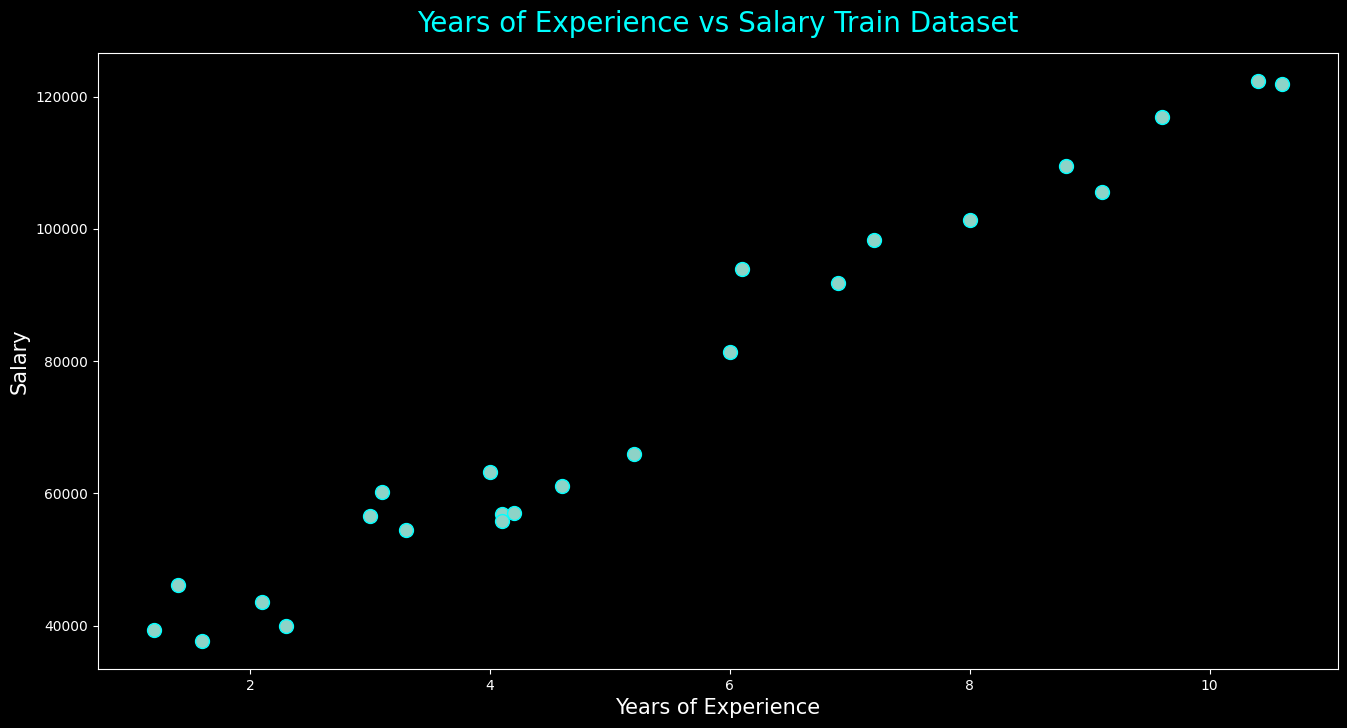

In [11]:
plt.figure(figsize=(16,8))
plt.scatter(X_train, y_train, marker="o", edgecolors="aqua", s=100)
plt.title(label="Years of Experience vs Salary Train Dataset", fontdict={"color": "aqua", "fontsize": 20}, pad=15)
plt.xlabel(xlabel="Years of Experience", fontsize=15)
plt.ylabel(ylabel="Salary", fontsize=15)
plt.show()

## Plot the testing dataset

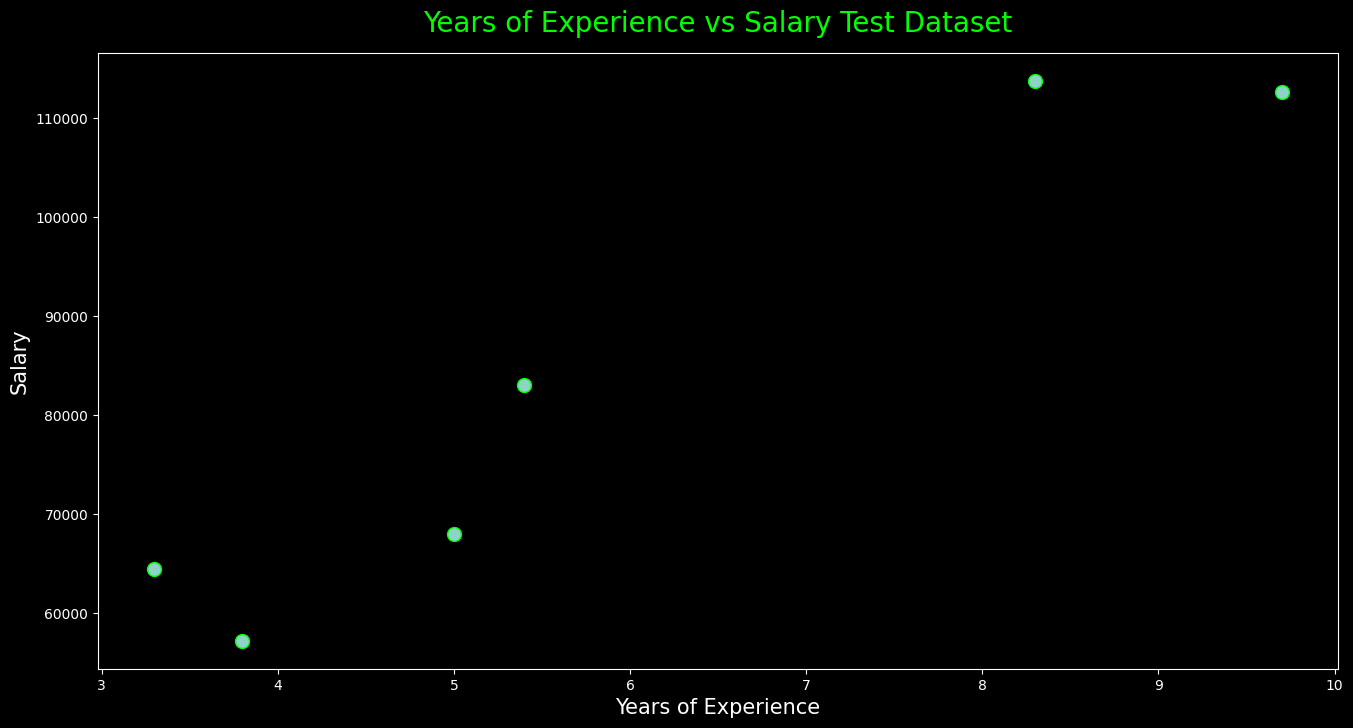

In [12]:
plt.figure(figsize=(16,8))
plt.scatter(X_test, y_test, marker="o", edgecolors="lime", s=100)
plt.title(label="Years of Experience vs Salary Test Dataset", fontdict={"color": "lime", "fontsize": 20}, pad=15)
plt.xlabel(xlabel="Years of Experience", fontsize=15)
plt.ylabel(ylabel="Salary", fontsize=15)
plt.show()

## Plot Predictions

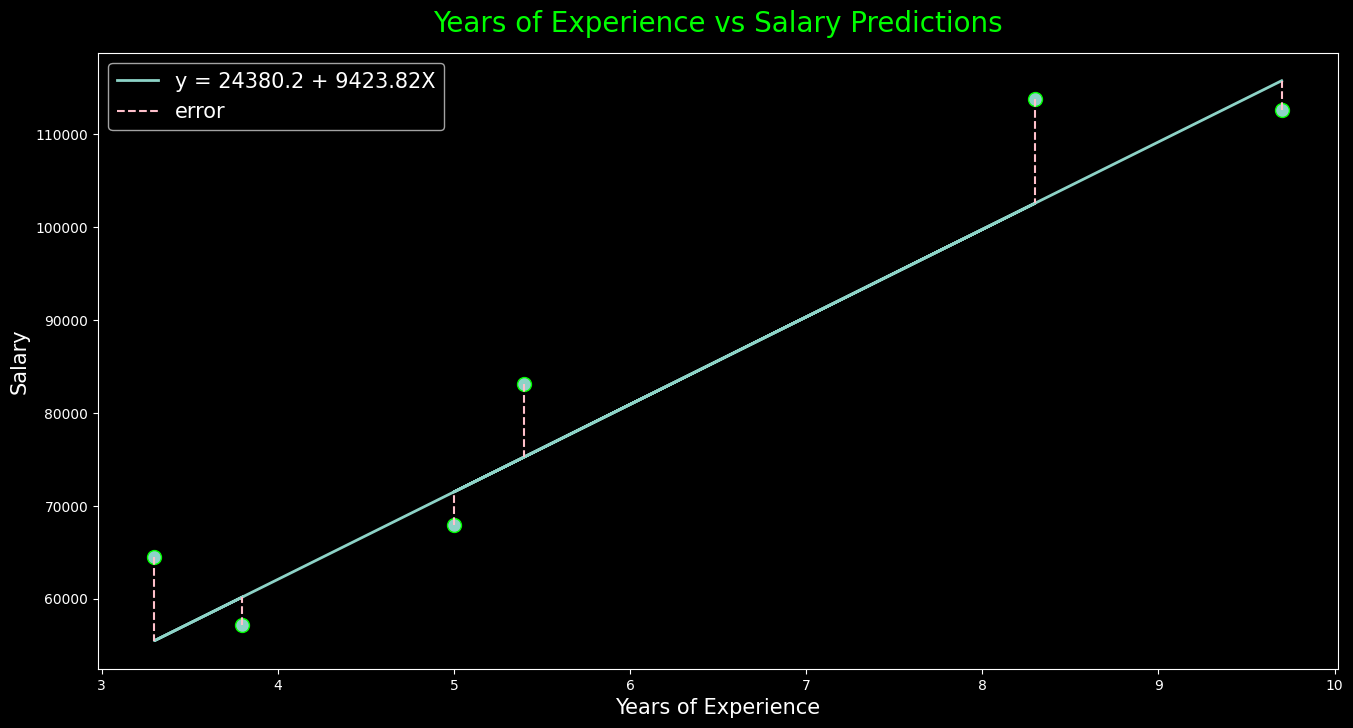

In [13]:
plt.figure(figsize=(16,8))
plt.scatter(X_test, y_test, marker="o", edgecolors="lime", s=100)
plt.title(label="Years of Experience vs Salary Predictions", fontdict={"color": "lime", "fontsize": 20}, pad=15)
plt.xlabel(xlabel="Years of Experience", fontsize=15)
plt.ylabel(ylabel="Salary", fontsize=15)
plt.plot(X_test, y_pred, linewidth=2, label=f"y = {lr.weights_()[0][0].round(2)} + {lr.weights_()[1][0].round(2)}X")
plt.vlines(X_test, ymin=y_test, ymax=y_pred, linestyles="--", colors="pink", label="error")
plt.legend(fontsize=15)
plt.show()

## Evaluate the model

In [14]:
RegressionMetrics.metrics_dataframe(y_true=y_test, y_pred=y_pred)

,MSE,RMSE,MAE,R2
0,49830096.86,7059.04,6286.45,0.9


In [15]:
RegressionMetrics.print_metrics(y_true=y_test, y_pred=y_pred)

MSE:     49830096.86
RMSE:    7059.04
MAE:     6286.45
R2:      0.9
